# July 16, 2025

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
data=pd.read_csv('beer-servings.csv', index_col=False)
data.shape

(193, 7)

In [4]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

['Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


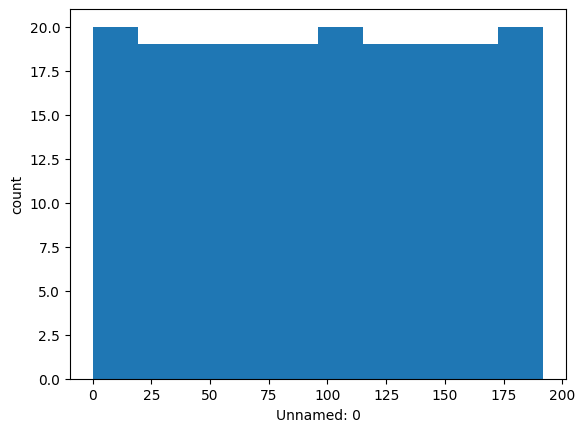

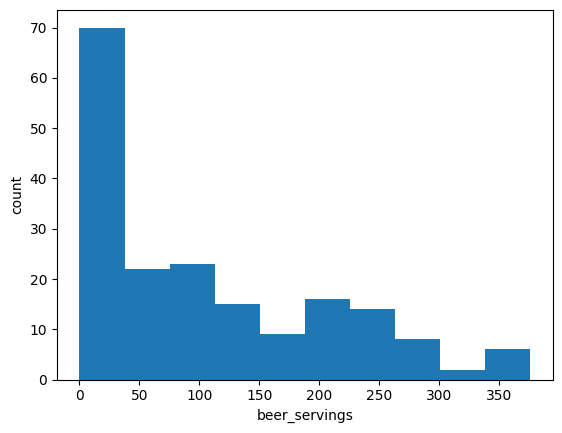

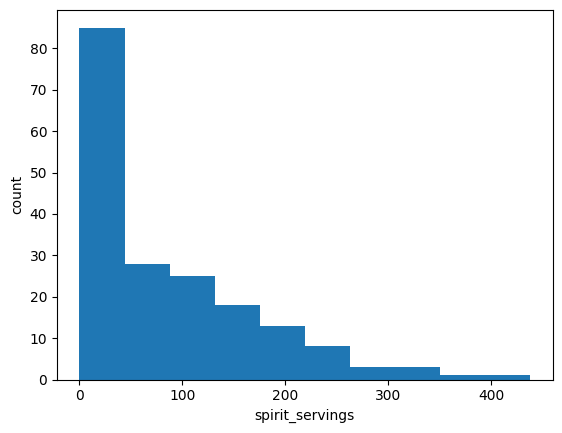

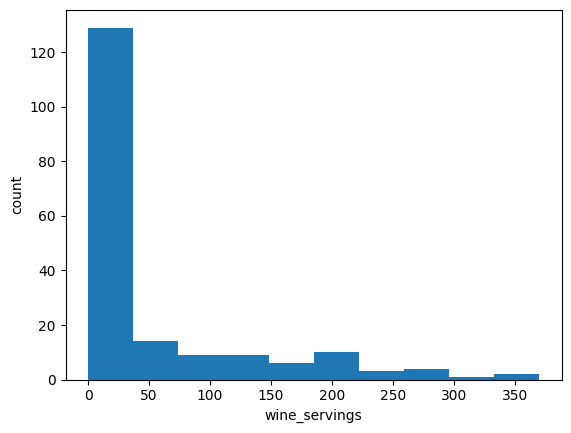

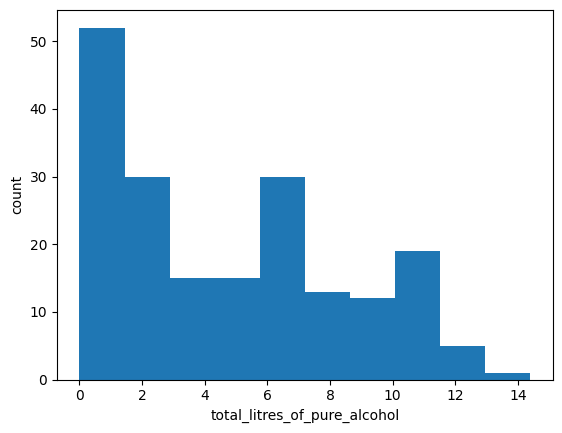

In [8]:
num_df = data.select_dtypes(include = "number" )
cat_df = data.select_dtypes(include = "object_")

num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [11]:
# Calculate medians for numeric columns
medians = num_df[num_cols].median()
# Fill missing values with calculated medians
num_df[num_cols] = num_df[num_cols].fillna(medians)
# Drop the 'Unnamed: 0' column before scaling
if 'Unnamed: 0' in num_df.columns:
    num_df = num_df.drop('Unnamed: 0', axis=1)
num_cols = num_df.columns.tolist() # Update num_cols after dropping the column

num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

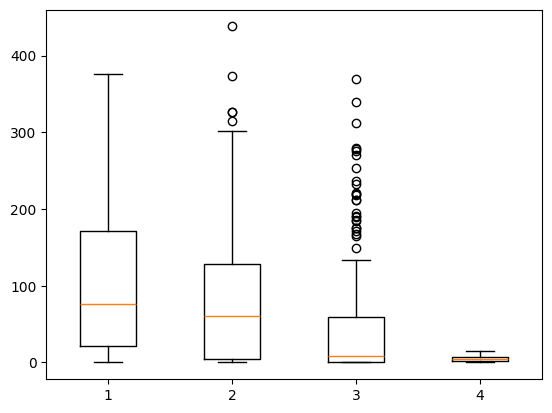

In [12]:
plt.boxplot(num_df)
plt.show()

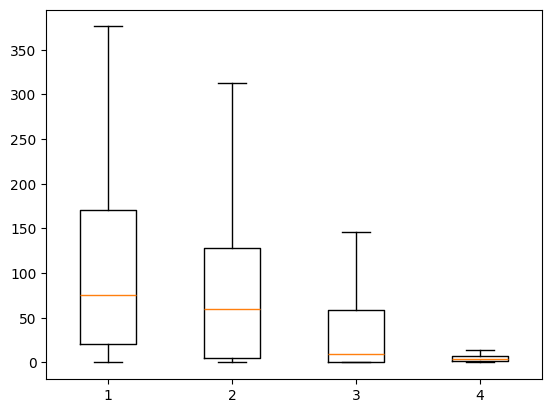

In [13]:
def clip_outliers(df,column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr=q3-q1
  upper_bound = q3 + 1.5* iqr
  lower_bound = q1 - 1.5* iqr
  df[column_name] = df[column_name].clip(upper=upper_bound)
  df[column_name] = df[column_name].clip(lower=lower_bound)
  return df[column_name]

for col in num_cols:
  num_df[col] = clip_outliers(num_df, col)

plt.boxplot(num_df)
plt.show()

## Min-Max Scaling

In [14]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col].min())/(num_df[col].max()-num_df[col].min())

for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].mean())/num_df[col].std()

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_df = min_max_scaler.fit_transform(num_df)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\_array_api.py:686: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\_array_api.py:706: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_df = std_scaler.fit_transform(num_df)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


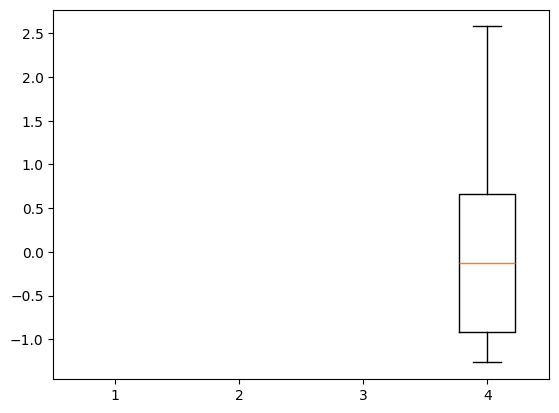

In [16]:
import pickle

with open("min_max_scaler.pkl", "wb") as f:
  pickle.dump(min_max_scaler, f)

with open("min_max_scaler.pkl", "rb") as f:
  min_max_scaler = pickle.load(f)

num_df = pd.DataFrame(num_df, columns=num_cols)

plt.boxplot(num_df)
plt.show()

In [17]:
test_input = np.array([[200,100,300,150]])
test_output = min_max_scaler.transform(test_input)
print(test_output)

[[        nan         nan         nan 10.41666667]]


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
data = {'color': ['yellow', 'green', 'blue', 'yellow', 'green']}
df=pd.DataFrame(data)

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=['blue', 'green', 'yellow'])
final_df = pd.concat([df, encoded_df], axis =1)
final_df

,color,blue,green,yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['color_encoded'] = encoder.fit_transform(df['color'])
df

,color,color_encoded
0,yellow,2
1,green,1
2,blue,0
3,yellow,2
4,green,1


In [23]:
from sklearn.preprocessing import LabelEncoder
cat_cols = cat_df.columns.tolist()
for col in cat_cols:
    encoder = LabelEncoder()
    cat_df[col] = encoder.fit_transform(cat_df[col])

In [24]:
import pickle
with open("label_encoder.pkl", "wb") as f:
  pickle.dump(encoder,f)

In [25]:
with open("label_encoder.pkl", "rb") as f:
  encoder = pickle.load(f)

final_df = pd.concat([cat_df, num_df], axis=1)

y = final_df["total_litres_of_pure_alcohol"]
X = final_df.drop("total_litres_of_pure_alcohol", axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Linear Regression Pipeline

### Import Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Exploratory Data Analysis

In [28]:
data = pd.read_csv('beer-servings.csv', index_col=False)

In [29]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [30]:
data = data.iloc[:, 1:]

In [31]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


### Data Cleaning/Preprocessing

Duplicate Row Removal

In [32]:
data.duplicated().sum()

np.int64(0)

Check Missing Values

In [33]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

Splitting Numerical and Categorical Columns

In [34]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

Check histogram of Numerical features for data inputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


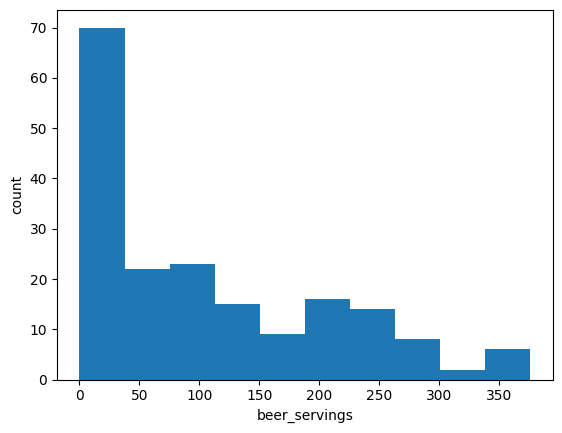

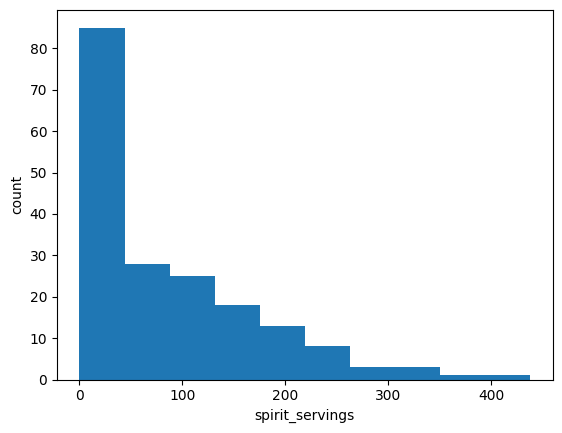

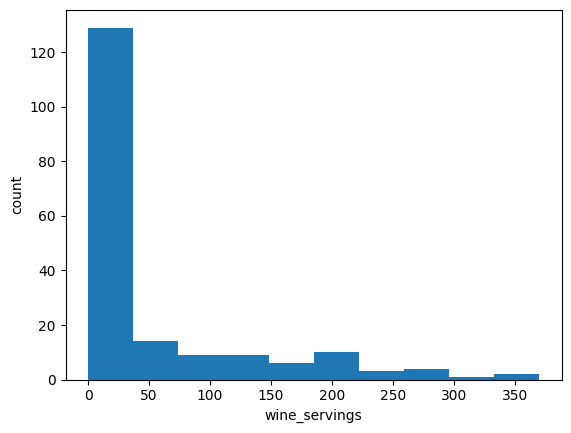

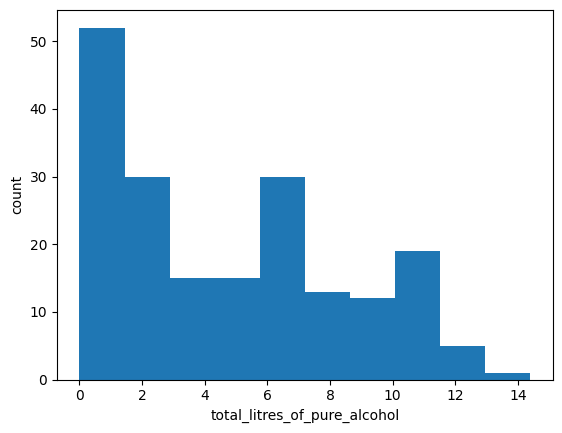

In [35]:
num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [36]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [37]:
num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

Outlier Handling

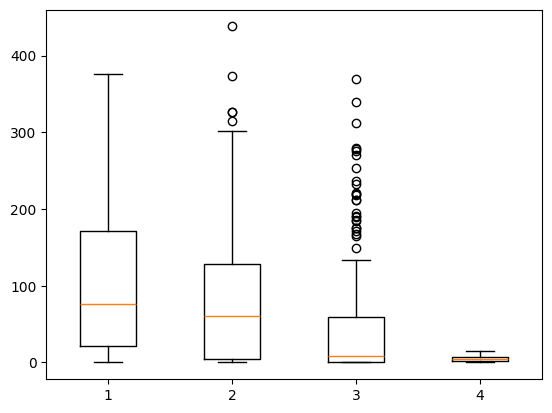

In [38]:
plt.boxplot(num_df)
plt.show()

In [39]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [40]:
for col in num_cols:
  num_df[col] = replace_outliers_with_upper_bound(num_df, col)

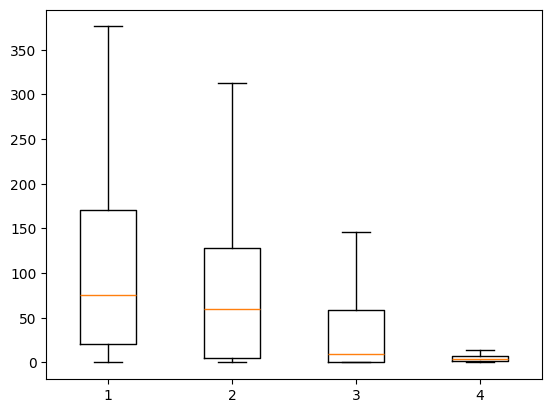

In [41]:
plt.boxplot(num_df)
plt.show()

Data Normalization

In [42]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


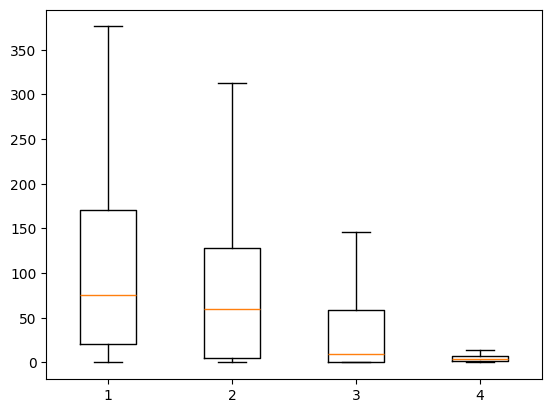

In [43]:
plt.boxplot(num_df)
plt.show()

In [44]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

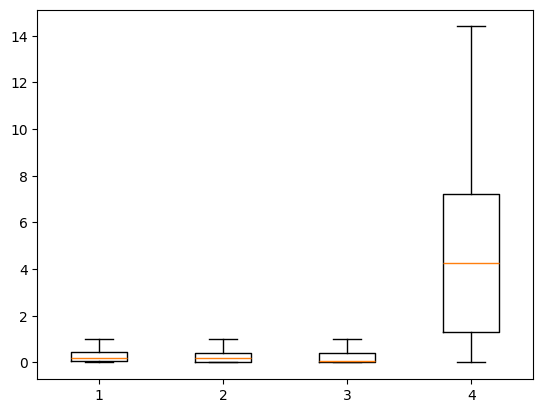

In [45]:
plt.boxplot(num_df)
plt.show()

Encoding of Categorial Variables

In [46]:
cat_df.head(2)

,country,continent
0,Afghanistan,Asia
1,Albania,Europe


In [47]:
cat_cols = cat_df.columns.tolist()

In [48]:
for col in cat_cols:
  print(cat_df[col].value_counts())

country
Afghanistan    1
Albania        1
Algeria        1
Andorra        1
Angola         1
              ..
Venezuela      1
Vietnam        1
Yemen          1
Zambia         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64
continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    encoder = LabelEncoder()
    cat_df[col] = encoder.fit_transform(cat_df[col])

In [51]:
final_df = pd.concat([num_df, cat_df], axis=1)